In [1]:
# ============================================================
# 📦 1. Import Libraries
# ============================================================

import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Set display and style options
pd.set_option('display.max_columns', None)
sns.set(style="whitegrid", palette="muted")

In [2]:
# ============================================================
# 📂 2. Load Dataset
# ============================================================

# Define the dataset path (adjust if needed)
base_dir = r"C:\Users\jackk\Desktop\Desktop\Data Analysis, Engineering Projects\churn_predictor_eda\Data"
data_path = os.path.join(base_dir, "WA_Fn-UseC_-Telco-Customer-Churn.csv")

# Load the dataset
df = pd.read_csv(data_path)

# Preview
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [3]:
# ============================================================
# 🔍 3. Inspect Data
# ============================================================

# Basic info and structure
df.info()

# Summary statistics for numeric and categorical columns
df.describe(include='all').T

# Missing values overview
df.isnull().sum()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [4]:
# ============================================================
# 🧹 4. Data Cleaning
# ============================================================

# Drop customerID as it is not analytically useful
df.drop('customerID', axis=1, inplace=True)

# Convert 'TotalCharges' to numeric (some values are stored as text)
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')

# Handle missing TotalCharges
df['TotalCharges'].fillna(df['TotalCharges'].median(), inplace=True)

# Encode binary categorical variables (Yes/No → 1/0)
for col in df.select_dtypes('object').columns:
    if df[col].nunique() == 2:
        df[col] = df[col].map({'Yes': 1, 'No': 0})

# Preview cleaned data
df.head()


C:\Users\jackk\AppData\Local\Temp\ipykernel_5676\3324974683.py:12: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['TotalCharges'].fillna(df['TotalCharges'].median(), inplace=True)


,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,NaN,0,1,0,1,0,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,1,Electronic check,29.85,29.85,0
1,NaN,0,0,0,34,1,No,DSL,Yes,No,Yes,No,No,No,One year,0,Mailed check,56.95,1889.50,0
2,NaN,0,0,0,2,1,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,1,Mailed check,53.85,108.15,1
3,NaN,0,0,0,45,0,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,0,Bank transfer (automatic),42.30,1840.75,0
4,NaN,0,0,0,2,1,No,Fiber optic,No,No,No,No,No,No,Month-to-month,1,Electronic check,70.70,151.65,1


In [5]:
# ============================================================
# 📊 5. Basic Insights
# ============================================================

# Churn distribution
df['Churn'].value_counts(normalize=True) * 100


Churn
0    73.463013
1    26.536987
Name: proportion, dtype: float64

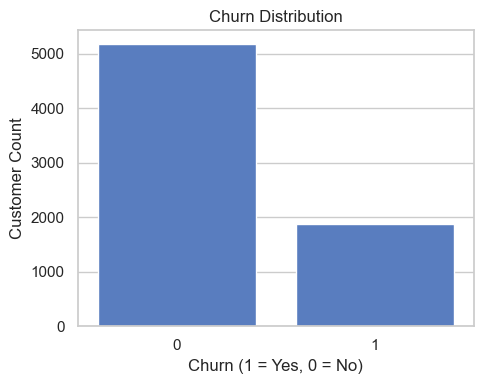

In [7]:
# Visualize churn distribution
plt.figure(figsize=(5, 4))
sns.countplot(x='Churn', data=df)
plt.title("Churn Distribution")
plt.xlabel("Churn (1 = Yes, 0 = No)")
plt.ylabel("Customer Count")
plt.tight_layout()
plt.savefig(r"C:\Users\jackk\Desktop\Desktop\Data Analysis, Engineering Projects\churn_predictor_eda/Output/churn_distribution.png", bbox_inches='tight')
plt.show()


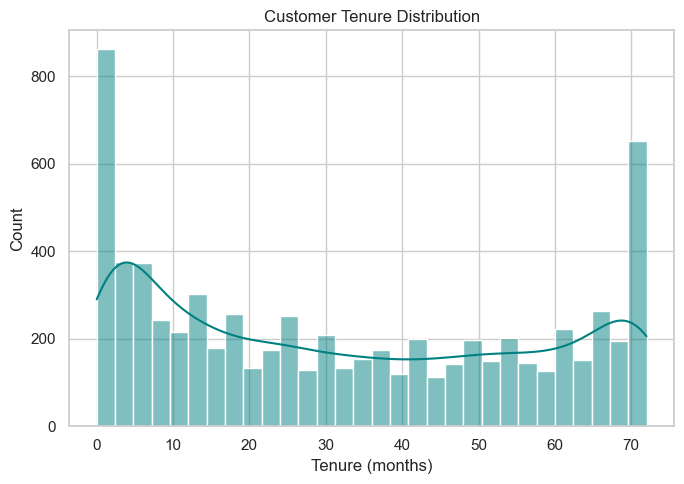

In [8]:
# ============================================================
# 📈 6. Univariate Analysis
# ============================================================

plt.figure(figsize=(7, 5))
sns.histplot(df['tenure'], bins=30, kde=True, color='teal')
plt.title("Customer Tenure Distribution")
plt.xlabel("Tenure (months)")
plt.ylabel("Count")
plt.tight_layout()
plt.savefig(r"C:\Users\jackk\Desktop\Desktop\Data Analysis, Engineering Projects\churn_predictor_eda/Output/tenure_distribution.png", bbox_inches='tight')
plt.show()


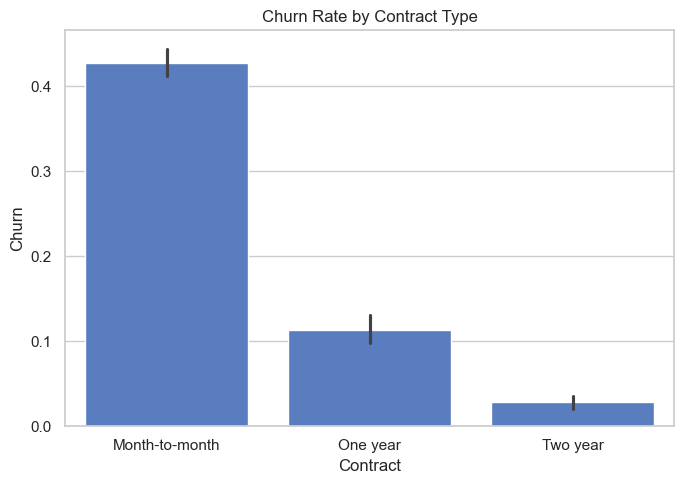

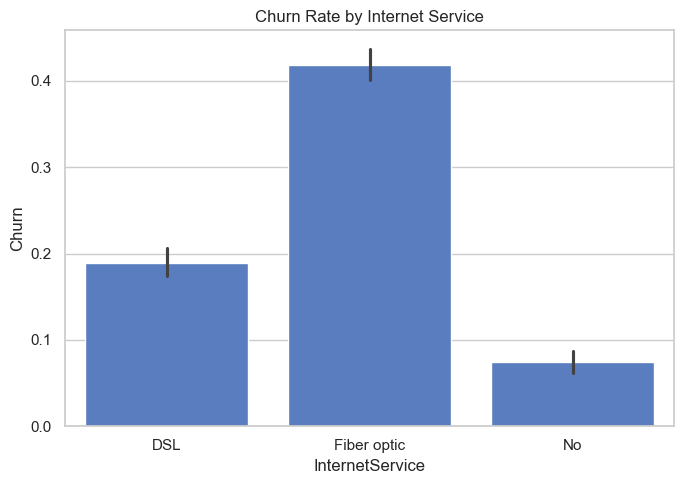

In [10]:
# ============================================================
# 🔗 7. Bivariate Insights
# ============================================================

# Churn rate by contract type
plt.figure(figsize=(7, 5))
sns.barplot(x='Contract', y='Churn', data=df)
plt.title("Churn Rate by Contract Type")
plt.tight_layout()
plt.savefig(r"C:\Users\jackk\Desktop\Desktop\Data Analysis, Engineering Projects\churn_predictor_eda/Output/churn_by_contract.png", bbox_inches='tight')
plt.show()

# Churn rate by internet service type
plt.figure(figsize=(7, 5))
sns.barplot(x='InternetService', y='Churn', data=df)
plt.title("Churn Rate by Internet Service")
plt.tight_layout()
plt.savefig(r"C:\Users\jackk\Desktop\Desktop\Data Analysis, Engineering Projects\churn_predictor_eda/Output/churn_by_internet.png", bbox_inches='tight')
plt.show()

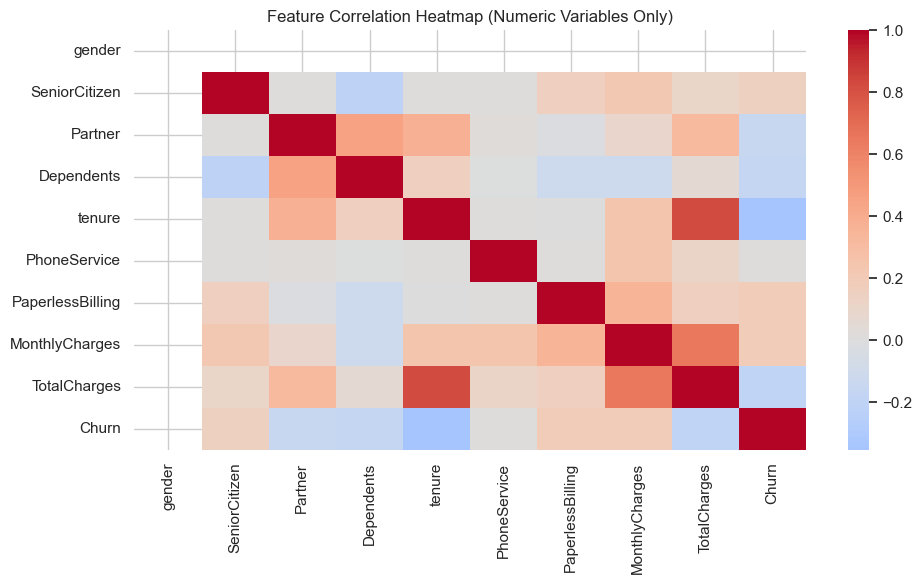

In [16]:
# ============================================================
# 🌡️ 8. Correlation Analysis
# ============================================================
# Keep only numeric columns
numeric_df = df.select_dtypes(include=[np.number])

plt.figure(figsize=(10, 6))
sns.heatmap(numeric_df.corr(), cmap="coolwarm", center=0)
plt.title("Feature Correlation Heatmap (Numeric Variables Only)")
plt.tight_layout()
plt.savefig(r"C:\Users\jackk\Desktop\Desktop\Data Analysis, Engineering Projects\churn_predictor_eda/Output/correlation_heatmap.png", bbox_inches='tight')
plt.show()


In [17]:
# ============================================================
# 💾 9. Save Cleaned Data
# ============================================================

# Save cleaned dataset for dashboard use
cleaned_path = os.path.join(base_dir, "cleaned_telco_churn.csv")
df.to_csv(cleaned_path, index=False)
print(f"Cleaned dataset saved at: {cleaned_path}")


Cleaned dataset saved at: C:\Users\jackk\Desktop\Desktop\Data Analysis, Engineering Projects\churn_predictor_eda\Data\cleaned_telco_churn.csv
